# Data Cleaning

## 1. Untitled data

In [92]:
data <- read.csv("https://raw.githubusercontent.com/kleban/r-book-published/refs/heads/main/datasets/untitled.csv", 
  header = F, 
  col.names = c("Age", "Height", "Weight", "Gender"))
data

  Age Height Weight           Gender
1  23    185   85.7             Male
2  41    175   68.3                M
3  11   142*   55.4           Female
4  12   <NA>   48.2              Man
5  54    171     NA Looks like a man
6  32    168   78.0                F

In [93]:
#install.packages("dplyr")

In [94]:
library(dplyr)
data <- data |> rename(AGE = Age)

In [95]:
data

  AGE Height Weight           Gender
1  23    185   85.7             Male
2  41    175   68.3                M
3  11   142*   55.4           Female
4  12   <NA>   48.2              Man
5  54    171     NA Looks like a man
6  32    168   78.0                F

## 2. Bad titles

In [96]:
data <- read.csv("https://raw.githubusercontent.com/kleban/r-book-published/refs/heads/main/datasets/badtitled.csv")
data

   Person.Age Person__Height person.Weight Person.Gender empty
1          23            185            NA          Male    NA
2          41            175          68.3             M    NA
3          11           142*          55.4        Female    NA
4          12           <NA>          48.2           Man    NA
5          54            191            NA        female    NA
6          32            168          78.0         F        NA
7          22           <NA>          54.0         male.    NA
8          21            165            NA             m    NA
9          14           <NA>          90.2           Man    NA
10         51            250            NA        female    NA
11         41             20          81.0         F        NA
12         66           <NA>          59.0         male.    NA
13         71            171            NA             m    NA

In [97]:
#install.packages("janitor")

In [98]:
library(janitor)

In [99]:
data <- clean_names(data)
data

   person_age person_height person_weight person_gender empty
1          23           185            NA          Male    NA
2          41           175          68.3             M    NA
3          11          142*          55.4        Female    NA
4          12          <NA>          48.2           Man    NA
5          54           191            NA        female    NA
6          32           168          78.0         F        NA
7          22          <NA>          54.0         male.    NA
8          21           165            NA             m    NA
9          14          <NA>          90.2           Man    NA
10         51           250            NA        female    NA
11         41            20          81.0         F        NA
12         66          <NA>          59.0         male.    NA
13         71           171            NA             m    NA

## 3. Person gender cleaning

In [100]:
adist("ao", "ao")

     [,1]
[1,]    0

In [101]:
adist("ao", "oa")

     [,1]
[1,]    2

In [102]:
adist("ao", "45fb")

     [,1]
[1,]    4

In [103]:
data

   person_age person_height person_weight person_gender empty
1          23           185            NA          Male    NA
2          41           175          68.3             M    NA
3          11          142*          55.4        Female    NA
4          12          <NA>          48.2           Man    NA
5          54           191            NA        female    NA
6          32           168          78.0         F        NA
7          22          <NA>          54.0         male.    NA
8          21           165            NA             m    NA
9          14          <NA>          90.2           Man    NA
10         51           250            NA        female    NA
11         41            20          81.0         F        NA
12         66          <NA>          59.0         male.    NA
13         71           171            NA             m    NA

In [104]:
m <- c("male", "female")

In [105]:
adj_m <- adist(data$person_gender, m)
colnames(adj_m) <- m
rownames(adj_m) <- data$person_gender
adj_m 

       male female
Male      1      3
   M      4      6
Female    2      1
Man       3      5
female    2      0
F         5      6
male.     1      3
m         3      5
Man       3      5
female    2      0
F         5      6
male.     1      3
m         3      5

In [106]:
install.packages("stringr")

In [107]:
library(stringr)
data = data |>
    mutate(person_gender = ifelse(str_trim(person_gender) == "F", "female", person_gender))
data

   person_age person_height person_weight person_gender empty
1          23           185            NA          Male    NA
2          41           175          68.3             M    NA
3          11          142*          55.4        Female    NA
4          12          <NA>          48.2           Man    NA
5          54           191            NA        female    NA
6          32           168          78.0        female    NA
7          22          <NA>          54.0         male.    NA
8          21           165            NA             m    NA
9          14          <NA>          90.2           Man    NA
10         51           250            NA        female    NA
11         41            20          81.0        female    NA
12         66          <NA>          59.0         male.    NA
13         71           171            NA             m    NA

In [108]:
adj_m <- adist(data$person_gender, m)
colnames(adj_m) <- m
rownames(adj_m) <- data$person_gender
adj_m

       male female
Male      1      3
   M      4      6
Female    2      1
Man       3      5
female    2      0
female    2      0
male.     1      3
m         3      5
Man       3      5
female    2      0
female    2      0
male.     1      3
m         3      5

In [109]:
nums <- apply(adj_m, 1, which.min)
nums

  Male      M Female    Man female female  male.      m    Man female female  male.      m 
     1      1      2      1      2      2      1      1      1      2      2      1      1 

In [110]:
data.frame(init = data$person_gender, coded = m[nums])

     init  coded
1    Male   male
2       M   male
3  Female female
4     Man   male
5  female female
6  female female
7   male.   male
8       m   male
9     Man   male
10 female female
11 female female
12  male.   male
13      m   male

In [111]:
data <- data |>
  mutate(person_gender = m[nums])
data

   person_age person_height person_weight person_gender empty
1          23           185            NA          male    NA
2          41           175          68.3          male    NA
3          11          142*          55.4        female    NA
4          12          <NA>          48.2          male    NA
5          54           191            NA        female    NA
6          32           168          78.0        female    NA
7          22          <NA>          54.0          male    NA
8          21           165            NA          male    NA
9          14          <NA>          90.2          male    NA
10         51           250            NA        female    NA
11         41            20          81.0        female    NA
12         66          <NA>          59.0          male    NA
13         71           171            NA          male    NA

## 5. Height cleaning

In [112]:
data

   person_age person_height person_weight person_gender empty
1          23           185            NA          male    NA
2          41           175          68.3          male    NA
3          11          142*          55.4        female    NA
4          12          <NA>          48.2          male    NA
5          54           191            NA        female    NA
6          32           168          78.0        female    NA
7          22          <NA>          54.0          male    NA
8          21           165            NA          male    NA
9          14          <NA>          90.2          male    NA
10         51           250            NA        female    NA
11         41            20          81.0        female    NA
12         66          <NA>          59.0          male    NA
13         71           171            NA          male    NA

In [113]:
data |> mutate(person_height = as.numeric(person_height))

Warning message:
There was 1 warning in `mutate()`.
ℹ In argument: `person_height = as.numeric(person_height)`.
Caused by warning:
! NAs introduced by coercion 


   person_age person_height person_weight person_gender empty
1          23           185            NA          male    NA
2          41           175          68.3          male    NA
3          11            NA          55.4        female    NA
4          12            NA          48.2          male    NA
5          54           191            NA        female    NA
6          32           168          78.0        female    NA
7          22            NA          54.0          male    NA
8          21           165            NA          male    NA
9          14            NA          90.2          male    NA
10         51           250            NA        female    NA
11         41            20          81.0        female    NA
12         66            NA          59.0          male    NA
13         71           171            NA          male    NA

In [114]:
data

   person_age person_height person_weight person_gender empty
1          23           185            NA          male    NA
2          41           175          68.3          male    NA
3          11          142*          55.4        female    NA
4          12          <NA>          48.2          male    NA
5          54           191            NA        female    NA
6          32           168          78.0        female    NA
7          22          <NA>          54.0          male    NA
8          21           165            NA          male    NA
9          14          <NA>          90.2          male    NA
10         51           250            NA        female    NA
11         41            20          81.0        female    NA
12         66          <NA>          59.0          male    NA
13         71           171            NA          male    NA

In [115]:
data = data |> 
  mutate(person_height = as.numeric(str_remove(data$person_height, pattern = "[*]")))
data

   person_age person_height person_weight person_gender empty
1          23           185            NA          male    NA
2          41           175          68.3          male    NA
3          11           142          55.4        female    NA
4          12            NA          48.2          male    NA
5          54           191            NA        female    NA
6          32           168          78.0        female    NA
7          22            NA          54.0          male    NA
8          21           165            NA          male    NA
9          14            NA          90.2          male    NA
10         51           250            NA        female    NA
11         41            20          81.0        female    NA
12         66            NA          59.0          male    NA
13         71           171            NA          male    NA

In [116]:
str(data)

'data.frame':	13 obs. of  5 variables:
 $ person_age   : int  23 41 11 12 54 32 22 21 14 51 ...
 $ person_height: num  185 175 142 NA 191 168 NA 165 NA 250 ...
 $ person_weight: num  NA 68.3 55.4 48.2 NA 78 54 NA 90.2 NA ...
 $ person_gender: chr  "male" "male" "female" "male" ...
 $ empty        : logi  NA NA NA NA NA NA ...


## 6. Missing

In [117]:
#install.packages("mice")

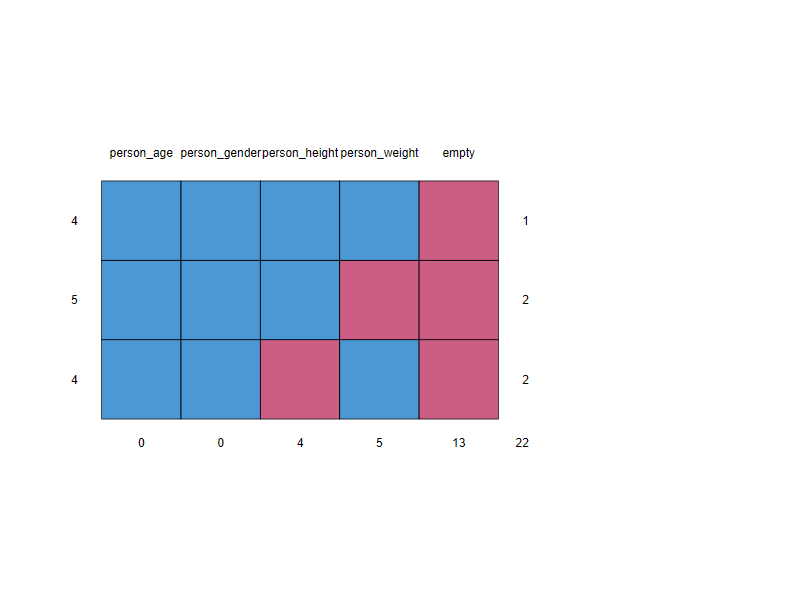

  person_age person_gender person_height person_weight empty   
4          1             1             1             1     0  1
5          1             1             1             0     0  2
4          1             1             0             1     0  2
           0             0             4             5    13 22

In [118]:
library(mice)
md.pattern(data)

In [119]:
#install.packages("VIM")



 Variables sorted by number of missings: 
      Variable     Count
         empty 1.0000000
 person_weight 0.3846154
 person_height 0.3076923
    person_age 0.0000000
 person_gender 0.0000000


Warning message:
In plot.aggr(res, ...) : not enough horizontal space to display frequencies


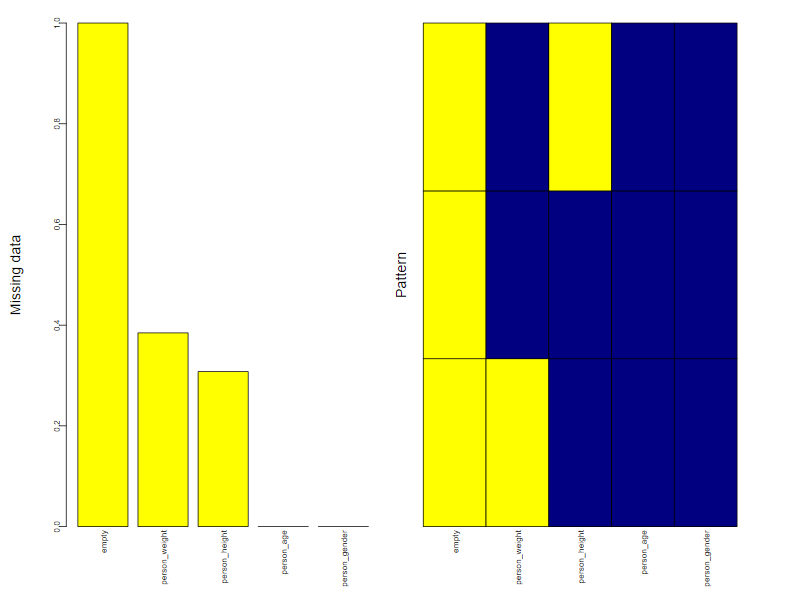


 Missings in variables:
      Variable Count
 person_height     4
 person_weight     5
         empty    13

In [120]:
library(VIM)
mice_plot <- aggr(data, 
  col=c('navyblue','yellow'),
  numbers=TRUE, 
  sortVars=TRUE,
  labels=names(data), 
  cex.axis=.7,
  gap=3, 
  ylab=c("Missing data","Pattern"))
mice_plot

In [121]:
#install.packages("Amelia")

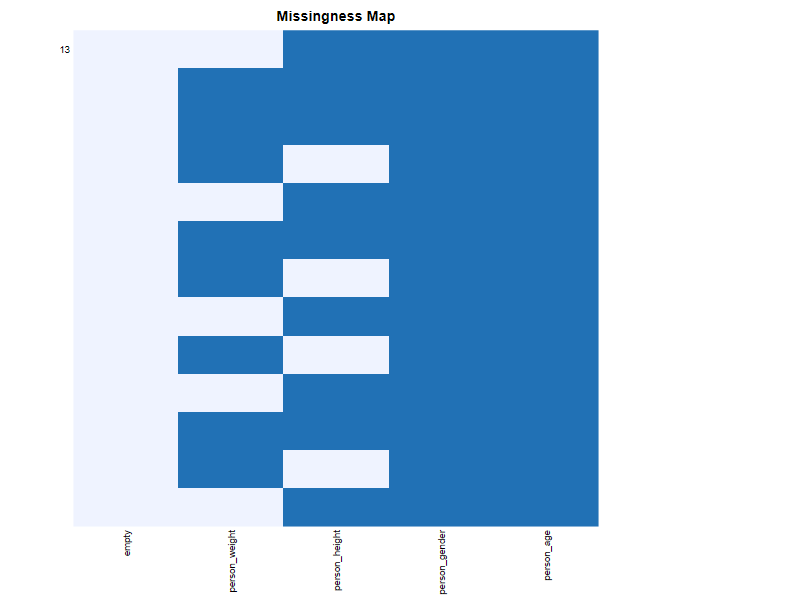

In [122]:
library(Amelia)
Amelia::missmap(data)

In [123]:
data

   person_age person_height person_weight person_gender empty
1          23           185            NA          male    NA
2          41           175          68.3          male    NA
3          11           142          55.4        female    NA
4          12            NA          48.2          male    NA
5          54           191            NA        female    NA
6          32           168          78.0        female    NA
7          22            NA          54.0          male    NA
8          21           165            NA          male    NA
9          14            NA          90.2          male    NA
10         51           250            NA        female    NA
11         41            20          81.0        female    NA
12         66            NA          59.0          male    NA
13         71           171            NA          male    NA

In [124]:
complete.cases(data)

 [1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [125]:
data <- remove_empty(data, which = c("rows", "cols"))
data

   person_age person_height person_weight person_gender
1          23           185            NA          male
2          41           175          68.3          male
3          11           142          55.4        female
4          12            NA          48.2          male
5          54           191            NA        female
6          32           168          78.0        female
7          22            NA          54.0          male
8          21           165            NA          male
9          14            NA          90.2          male
10         51           250            NA        female
11         41            20          81.0        female
12         66            NA          59.0          male
13         71           171            NA          male

In [126]:
data[!complete.cases(data),]

   person_age person_height person_weight person_gender
1          23           185            NA          male
4          12            NA          48.2          male
5          54           191            NA        female
7          22            NA          54.0          male
8          21           165            NA          male
9          14            NA          90.2          male
10         51           250            NA        female
12         66            NA          59.0          male
13         71           171            NA          male

In [127]:
na.omit(data)

   person_age person_height person_weight person_gender
2          41           175          68.3          male
3          11           142          55.4        female
6          32           168          78.0        female
11         41            20          81.0        female

In [128]:
data |>
  mutate(person_weight = ifelse(is.na(person_weight), 0, person_weight))

   person_age person_height person_weight person_gender
1          23           185           0.0          male
2          41           175          68.3          male
3          11           142          55.4        female
4          12            NA          48.2          male
5          54           191           0.0        female
6          32           168          78.0        female
7          22            NA          54.0          male
8          21           165           0.0          male
9          14            NA          90.2          male
10         51           250           0.0        female
11         41            20          81.0        female
12         66            NA          59.0          male
13         71           171           0.0          male

In [129]:
library(tidyr)

In [130]:
data |> 
    mutate_if(is.numeric, replace_na, replace = 0)

   person_age person_height person_weight person_gender
1          23           185           0.0          male
2          41           175          68.3          male
3          11           142          55.4        female
4          12             0          48.2          male
5          54           191           0.0        female
6          32           168          78.0        female
7          22             0          54.0          male
8          21           165           0.0          male
9          14             0          90.2          male
10         51           250           0.0        female
11         41            20          81.0        female
12         66             0          59.0          male
13         71           171           0.0          male

In [131]:
mean(data$person_weight)

[1] NA

In [134]:
data |>
  mutate(person_weight = ifelse(is.na(person_weight), mean(person_weight, na.rm = T), person_weight))


In [133]:
## Hot deck imputation

In [137]:
#install.packages("Hmisc")

In [140]:
library(Hmisc)


Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units



Warning message:
package ‘Hmisc’ was built under R version 4.4.3 


In [138]:
data

   person_age person_height person_weight person_gender
1          23           185            NA          male
2          41           175          68.3          male
3          11           142          55.4        female
4          12            NA          48.2          male
5          54           191            NA        female
6          32           168          78.0        female
7          22            NA          54.0          male
8          21           165            NA          male
9          14            NA          90.2          male
10         51           250            NA        female
11         41            20          81.0        female
12         66            NA          59.0          male
13         71           171            NA          male

In [143]:
data_hot <- data |> 
  mutate(person_weight = impute(data$person_weight, "random")) 

In [144]:
data_hot 

   person_age person_height person_weight person_gender
1          23           185          81.0          male
2          41           175          68.3          male
3          11           142          55.4        female
4          12            NA          48.2          male
5          54           191          55.4        female
6          32           168          78.0        female
7          22            NA          54.0          male
8          21           165          68.3          male
9          14            NA          90.2          male
10         51           250          48.2        female
11         41            20          81.0        female
12         66            NA          59.0          male
13         71           171          48.2          male

## Segment missing impute

In [145]:
data_sgm <- data |> 
                group_by(person_gender) |>
                mutate(person_weight = replace_na(person_weight, mean(person_weight, na.rm = TRUE)))
data_sgm

# A tibble: 13 × 4
# Groups:   person_gender [2]
   person_age person_height person_weight person_gender
        <int>         <dbl>         <dbl> <chr>        
 1         23           185          63.9 male         
 2         41           175          68.3 male         
 3         11           142          55.4 female       
 4         12            NA          48.2 male         
 5         54           191          71.5 female       
 6         32           168          78   female       
 7         22            NA          54   male         
 8         21           165          63.9 male         
 9         14            NA          90.2 male         
10         51           250          71.5 female       
11         41            20          81   female       
12         66            NA          59   male         
13         71           171          63.9 male         

In [146]:
data_knn <- kNN(data)
data_knn

   person_age person_height person_weight person_gender person_age_imp person_height_imp
1          23           185          59.0          male          FALSE             FALSE
2          41           175          68.3          male          FALSE             FALSE
3          11           142          55.4        female          FALSE             FALSE
4          12           168          48.2          male          FALSE              TRUE
5          54           191          68.3        female          FALSE             FALSE
6          32           168          78.0        female          FALSE             FALSE
7          22           168          54.0          male          FALSE              TRUE
8          21           165          59.0          male          FALSE             FALSE
9          14           168          90.2          male          FALSE              TRUE
10         51           250          68.3        female          FALSE             FALSE
11         41        

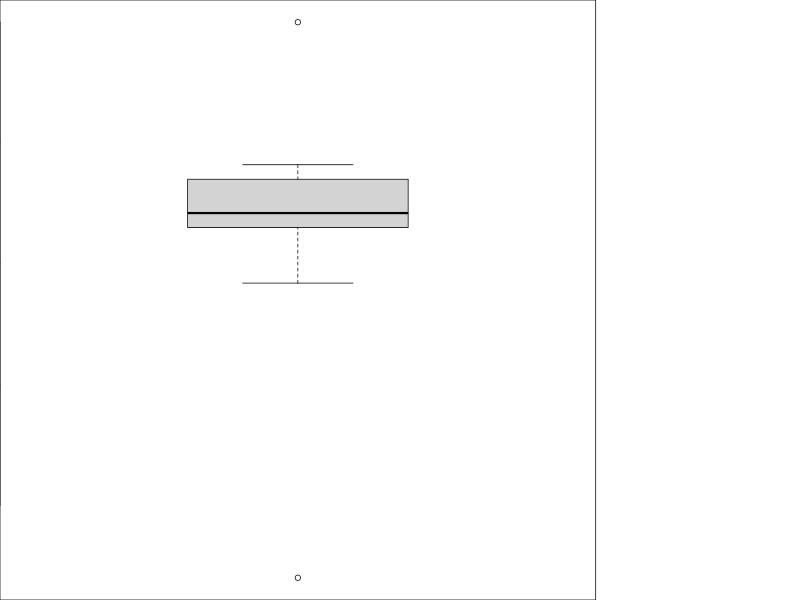

In [147]:
boxplot(data$person_height)

## Outliers

In [148]:
temp <- c(15, 17, 19, 12, 30, 41, 17, 20)

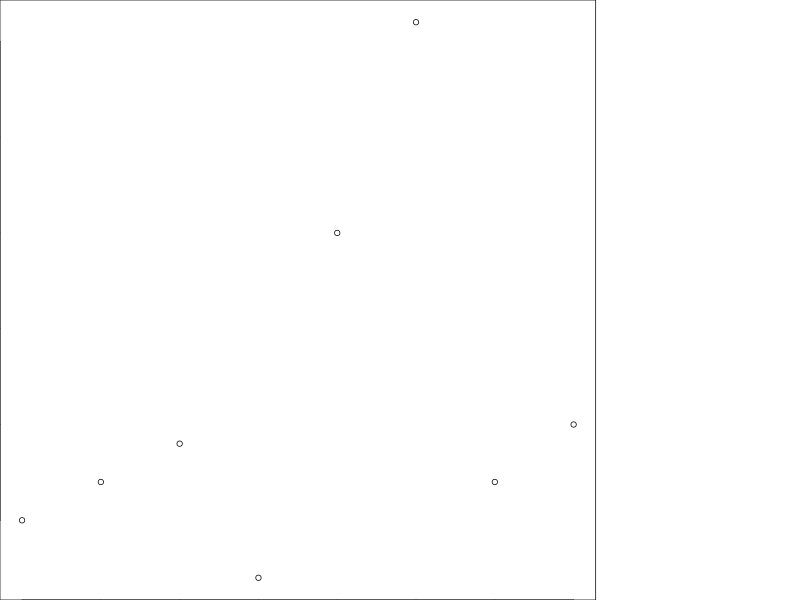

In [150]:
plot(temp)

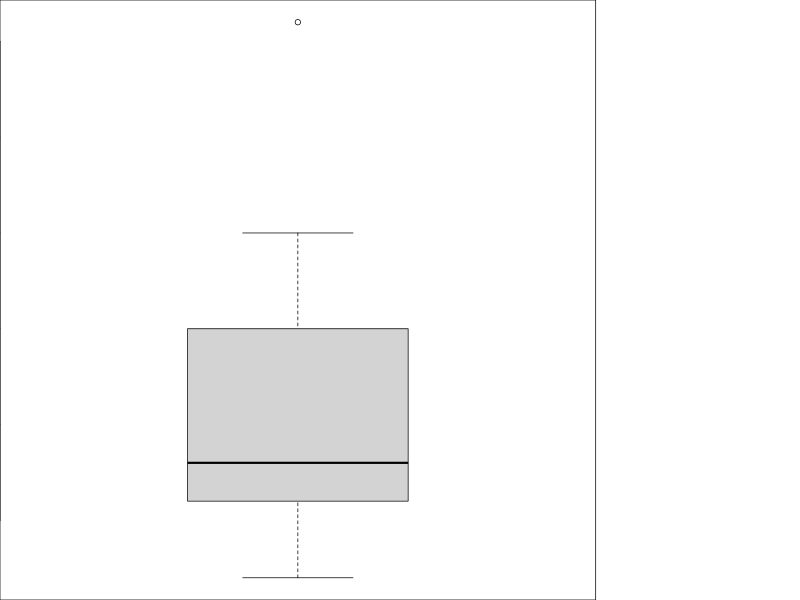

In [152]:
boxplot(temp, ylab = "Celcium")

In [154]:
river_data <- read.csv("https://raw.githubusercontent.com/kleban/r-book-published/refs/heads/main/datasets/river_eco.csv")
river_data

    index nitrate    months
1       1   1.581   January
2       2   1.323  February
3       3   1.140     March
4       4   1.245     April
5       5   1.072       May
6       6   1.483      June
7       7   1.162      July
8       8   1.304    August
9       9   1.140 September
10     10   1.118   October
11     11   1.342  November
12     12   1.245  December
13     13   1.204   January
14     14   1.140  February
15     15   1.204     March
16     16   1.118     April
17     17   1.025       May
18     18   1.118      June
19     19   1.285      July
20     20   1.140    August
21     21   0.949 September
22     22   0.922   October
23     23   0.949  November
24     24   1.118  December
25     25   1.265   January
26     26   1.095  February
27     27   1.183     March
28     28   1.162     April
29     29   1.118       May
30     30   1.285      June
31     31   1.049      July
32     32   0.922    August
33     33   0.775 September
34     34   0.866   October
35     35   0.922  N

In [155]:
m_levels <- river_data$months[1:12]
river_data <- river_data |>
    mutate(months = factor(months, levels = m_levels))
head(river_data)

  index nitrate   months
1     1   1.581  January
2     2   1.323 February
3     3   1.140    March
4     4   1.245    April
5     5   1.072      May
6     6   1.483     June

In [156]:
summary(river_data$nitrate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5920  0.9485  1.0680  1.0649  1.1700  1.8970 

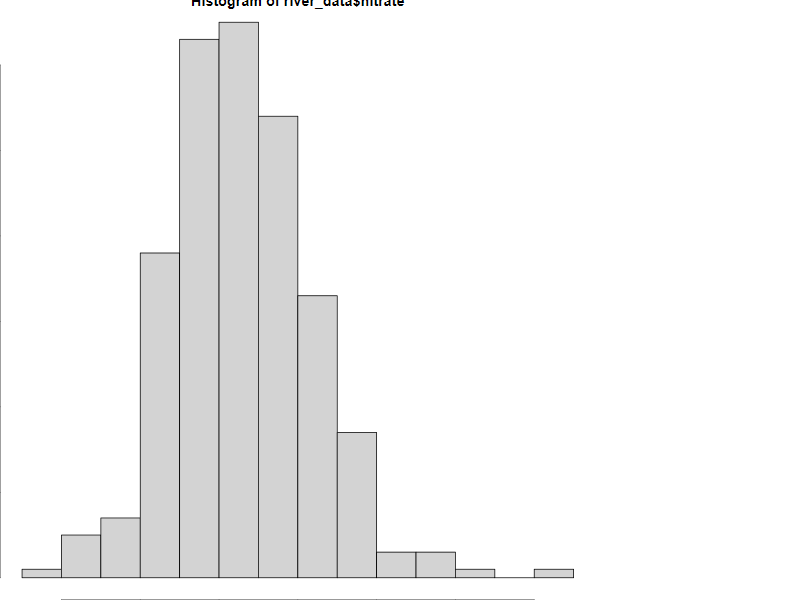

In [160]:
hist(river_data$nitrate)

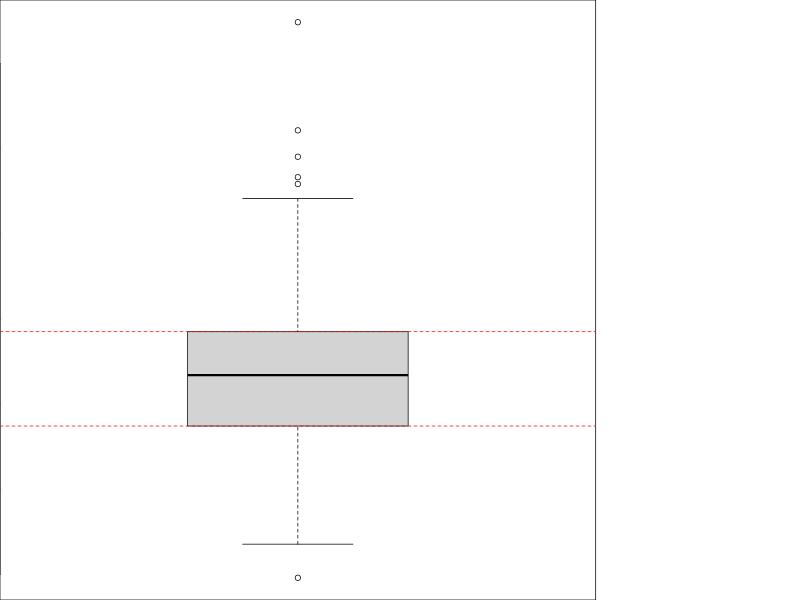

In [158]:
boxplot(river_data$nitrate)
# Додамо лінії 1 та 3 квантилів
abline(h=quantile(river_data$nitrate,0.25),col="red",lty=2)
abline(h=quantile(river_data$nitrate,0.75),col="red",lty=2)

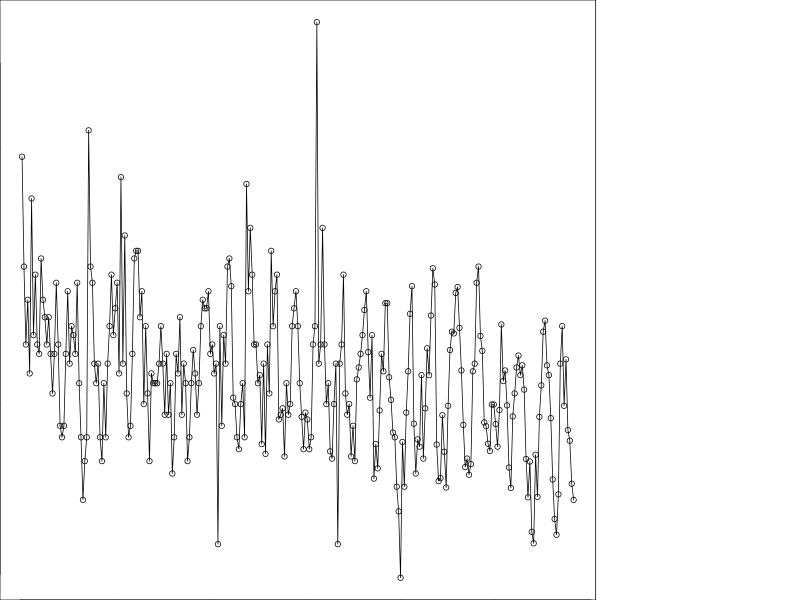

In [162]:
plot(nitrate ~ index, data = river_data, type = "o")

In [163]:
river_grouped <- river_data |> group_by(months) |> summarise(mean = mean(nitrate))
river_grouped

# A tibble: 12 × 2
   months     mean
   <fct>     <dbl>
 1 January   1.22 
 2 February  1.18 
 3 March     1.11 
 4 April     1.02 
 5 May       0.998
 6 June      0.979
 7 July      0.981
 8 August    0.938
 9 September 0.989
10 October   1.04 
11 November  1.10 
12 December  1.23 

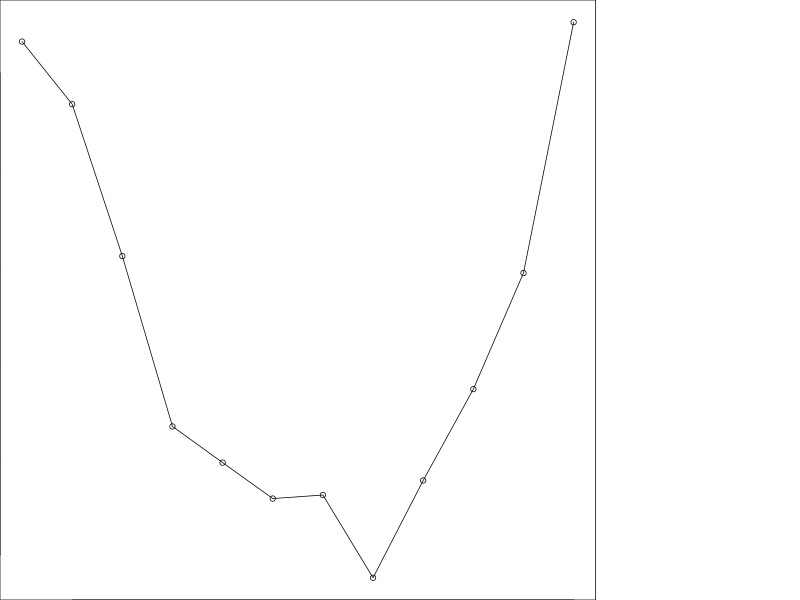

In [165]:
plot(river_grouped$mean, type = "o", xlab = "Month", ylab = "Monthly mean")

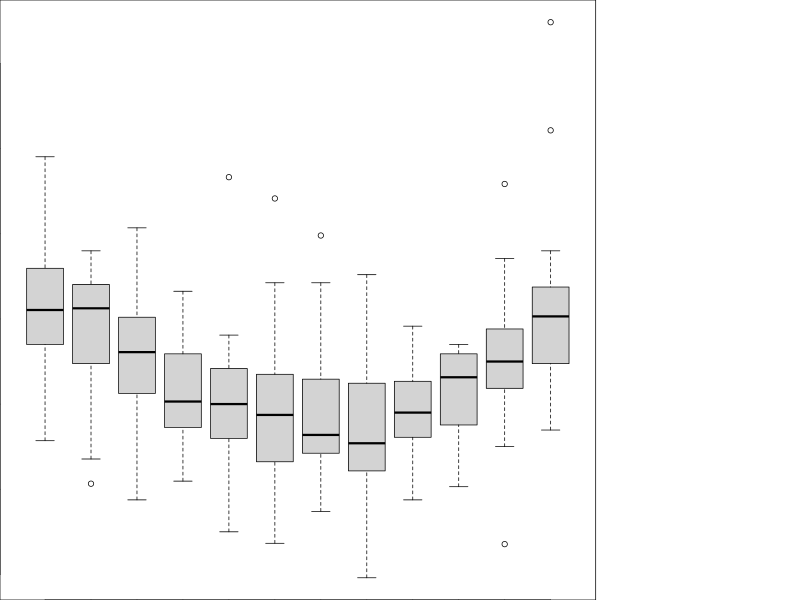

In [167]:
boxplot(nitrate ~ months, data = river_data)

In [170]:
lower_bound <- quantile(river_data$nitrate, 0.025)
lower_bound

   2.5% 
0.75475 

In [171]:
upper_bound <- quantile(river_data$nitrate, 0.975)
upper_bound

 97.5% 
1.4095 

In [172]:
outlier_index <- which(river_data$nitrate < lower_bound | river_data$nitrate > upper_bound)
outlier_index

 [1]   1   6  36  53 104 119 121 156 159 167 199 200 269 270 281 282

In [173]:
river_data$nitrate_upd <- river_data$nitrate
qnt <- quantile(river_data$nitrate_upd, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(qnt[1], na.rm = T)
river_data$nitrate_upd[river_data$nitrate_upd < (qnt[1] - H)] <- qnt[1]
river_data$nitrate_upd[river_data$nitrate_upd > (qnt[2] + H)] <- qnt[2]

qnt

    5%    95% 
0.8050 1.3325 

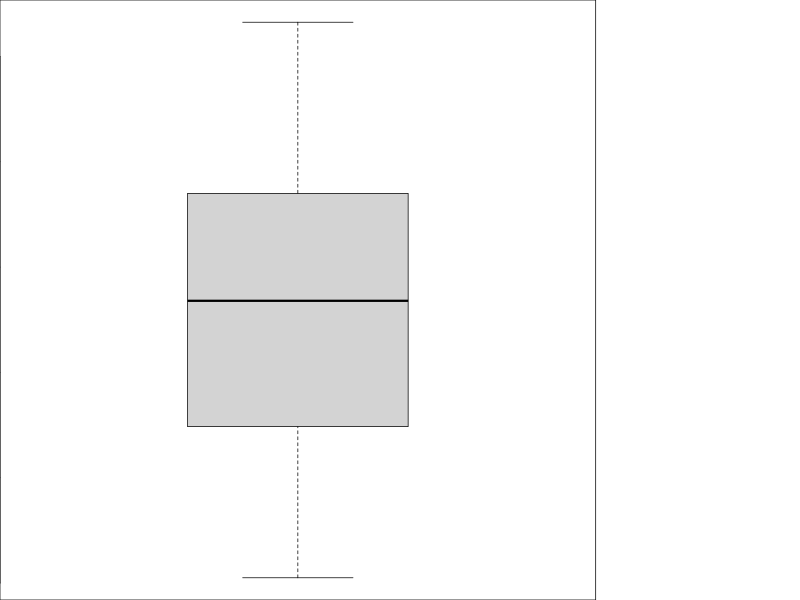

In [175]:
boxplot(river_data$nitrate_upd)

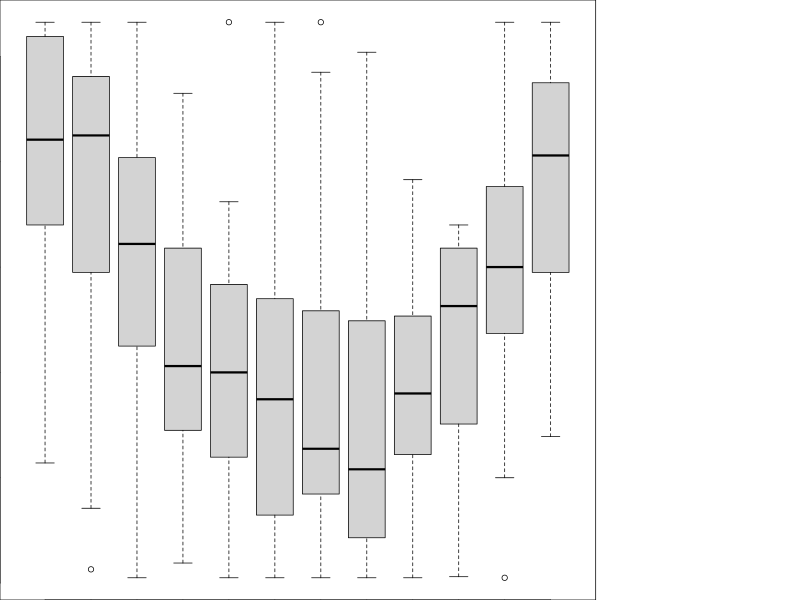

In [177]:
boxplot(nitrate_upd ~ months, data = river_data)

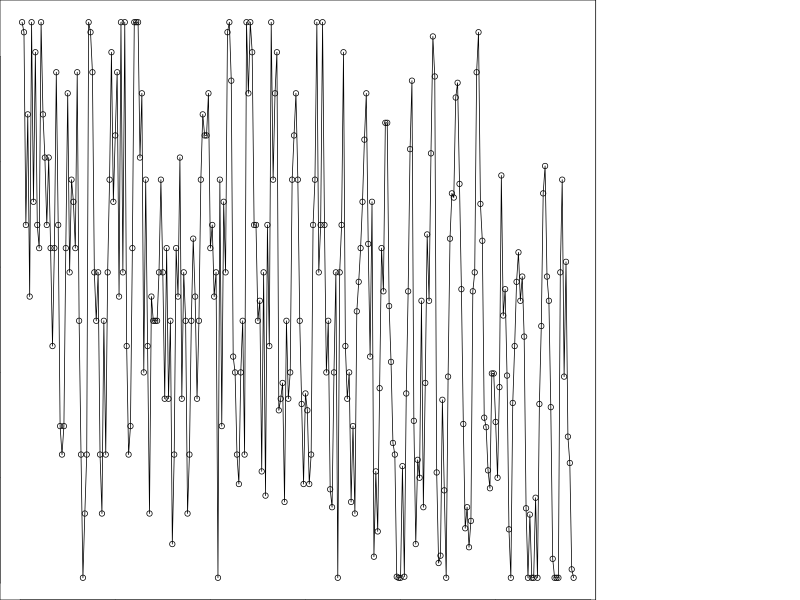

In [179]:
plot(nitrate_upd ~ index, data = river_data, type = "o")
